# Data Preprocessing for MPG Forecasting Model

**About the MPG Forecasting Model**<br><br>
This project uses the built-in mpg dataset from the Seaborn library, which contains data on various car attributes such as miles per gallon (MPG), horsepower, weight, origin, and more. The main objective of the model is to predict a car's fuel efficiency (MPG) based on its characteristics.

Using linear regression, the model learns the relationship between MPG and features like engine horsepower, weight, and origin of the car. By fitting a linear model, we can estimate how each feature impacts fuel efficiency and predict MPG values for new cars, enabling better insights into factors that influence fuel consumption.

## Libraries
- Numpy and pandas
- Matplotlib and Seaborn
- Warnings (to avoid minor errors)
- Datetime

# Tasks
- Import Libraries
- Load Dataset
- Sanity Check
    - Check for duplicate values and handle them
    - Remove unnecessary Columns
    - Standardize Columns Name
    - Create meaningful data
    - Check for missing values and handle them
- Exploratory Data Analysis
    - Get summary statistics
    - Univariate Analysis
        - countplot() for unique value distribuition
        - distplot() for data density check
    - Bivariate Analysis
        - boxplot() for examining relationship between target and other variables.
    - Multivariate Analysis
        - lmplot() for scatter relation between target and other variables in different origins
    - Correlation Analysis
        - heatmap() for correlation matrix
- Feature Engineering
    - Enhance data clarity with nre derived columns
    - Categorical Encoding to creates binary columns for categorical variable
- Save The File
    - save the clean file to csv format

# Import libraries

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import warnings

from datetime import datetime

warnings.filterwarnings("ignore")

# Load Dataset

In [2]:
# Loading mpg dataset from seaborn library
df = sns.load_dataset("mpg")

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


# Sanity Check
- Remove Duplicate Columns
- Remove Unnecessary Columns
- Formatting Columns Names

## Duplicate Check

In [4]:
# check total duplicate values
df.duplicated().sum()

np.int64(0)

## Standardize Column Names and Removes Unuseful Columns

In [5]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [6]:
# remove unuseful columns
df.drop('name', axis=1, inplace=True)

df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin'],
      dtype='object')

In [7]:
# rename column names
df.rename(columns={"model_year" : "model year"}, inplace=True)

df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')

## Convert Data into Meaningful Values

In [8]:
# Meaningful column value replacements
df['model year'] = 1900 + df["model year"]

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,1970,usa
1,15.0,8,350.0,165.0,3693,11.5,1970,usa
2,18.0,8,318.0,150.0,3436,11.0,1970,usa
3,16.0,8,304.0,150.0,3433,12.0,1970,usa
4,17.0,8,302.0,140.0,3449,10.5,1970,usa


# Handling Missing Values

In [9]:
# check null values
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [10]:
# check null data
df[df.isnull().any(axis=1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,NaN,2046,19.0,1971,usa
126,21.0,6,200.0,NaN,2875,17.0,1974,usa
330,40.9,4,85.0,NaN,1835,17.3,1980,europe
336,23.6,4,140.0,NaN,2905,14.3,1980,usa
354,34.5,4,100.0,NaN,2320,15.8,1981,europe
374,23.0,4,151.0,NaN,3035,20.5,1982,usa


**NOTE:** Since there is no significate data loss, we can drop the NaN Values

In [11]:
# drop null values
df.dropna(inplace=True)

In [12]:
# dataset review with new changes
row, col = df.shape
print("Number of Rows:", row)
print("Number of Columns:", col)

Number of Rows: 392
Number of Columns: 8


In [13]:
# recheck null values (return true if any)
df.isnull().sum().any()

np.False_

**NOTE:** Since **`df.isnull().sum().any()`** returned false, there is no more null values

# Exploratory Data Analysis (EDA)

**Quick overview of the dataset**

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 27.6+ KB


**Summary of the dataset**

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
cylinders,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
displacement,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
weight,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
acceleration,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
model year,392.0,1975.979592,3.683737,1970.0,1973.000,1976.00,1979.000,1982.0


## Univariate Analysis
- countplots for unique value distribution
- distplots for data density distribution

### countplot for cylinders

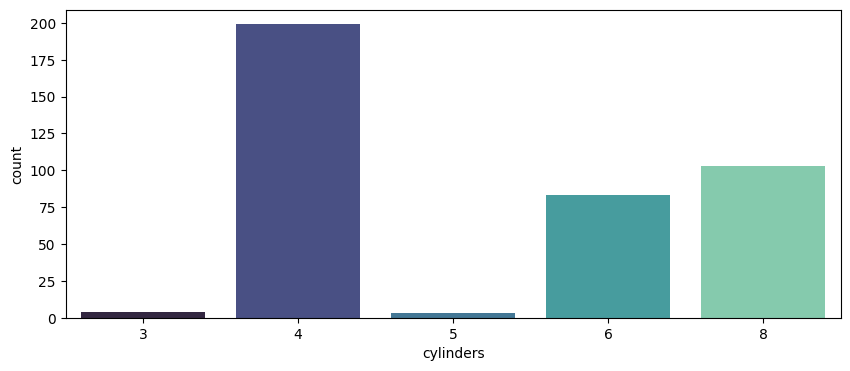

In [16]:
# Figure size
plt.figure(figsize=(10, 4))

# countplot for cylinders
sns.countplot(data=df, x="cylinders", palette="mako")
plt.show()

**Key Observations**
- ***Dominance of 4-cylinder engines:*** The majority of cars in the dataset have 4 cylinders , with over 200 occurrences.
- ***Fewer 3-cylinder, and 5-cylinder engines:*** Cars with 3, or 5, cylinders are relatively rare, with very low counts.
- ***Significant presence of 8-cylinder engines:*** There are approximately 100 cars with 8 cylinders, making it the second most common category after 4-cylinder engines.<br><br>

**Key Takeway**<br><br>
The dataset is heavily skewed toward 4-cylinder engines , with 8-cylinder engines being the next most common. This suggests that models predicting MPG or other outcomes should account for the dominance of 4-cylinder engines.<br><br>

**Decision**
- ***Focus on 4-cylinders and 8-cylinder engines:*** Since these are the most common, they may be the primary drivers of MPG trends.

### countplot for model year

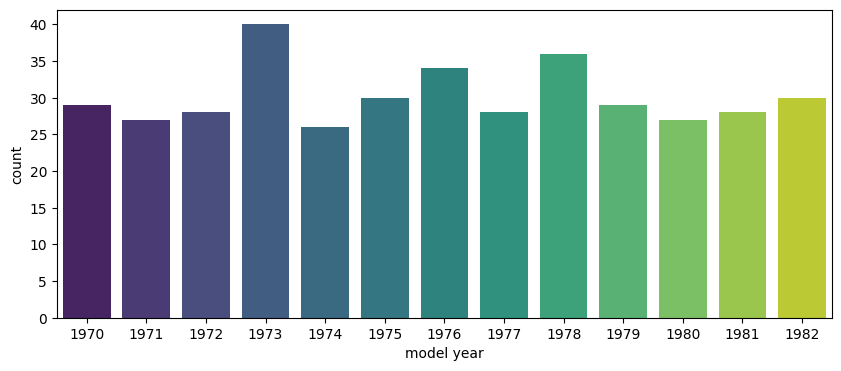

In [17]:
# Figure size
plt.figure(figsize=(10, 4))

# countplot for model year
sns.countplot(data=df, x="model year", palette="viridis")

plt.show()

**Key Observations**
- ***Most cars are from the mid-1970s:*** The highest counts occur around 1973–1978 , with peaks at 1973 (~40 cars) and 1978 (~35 cars).
- ***Decline after 1978:*** The number of cars decreases slightly after 1978, though it remains relatively stable until 1982.
- ***Low counts in early years:*** There are fewer cars from the earlier years (e.g., 1970–1972), indicating that the dataset might be more focused on later models.<br><br>

**Key Takeaway**<br><br>
The dataset is heavily skewed toward cars from the mid-1970s (1973–1978) , with a slight decline afterward. This suggests that the dataset may not capture a uniform representation of all model years, potentially biasing the analysis toward this specific time period.<br><br>

**Decision**
- ***Focus on Mid-1970s Data:*** Since most cars are from the mid-1970s, this period will likely dominate any trends observed in MPG.

### countplot for origin

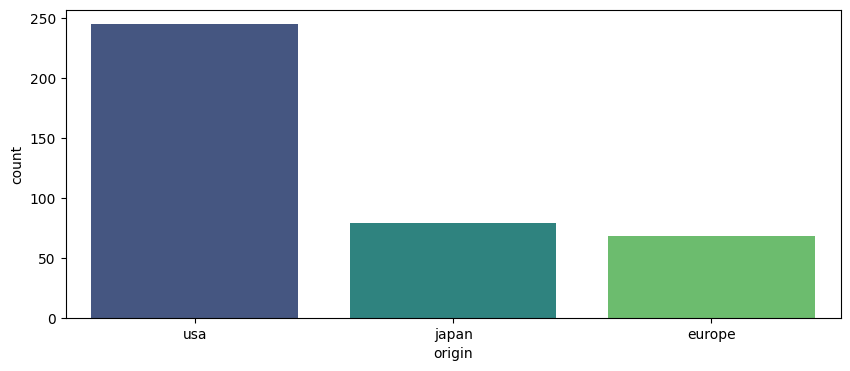

In [18]:
# Figure size
plt.figure(figsize=(10, 4))

# countplot for origin
sns.countplot(data=df, x="origin", palette="viridis")

plt.show()

**Key Observations**
- ***USA dominates:*** The majority of cars in the dataset are from the USA , with around 250 occurrences.
- ***Japan is second:*** There are approximately 80 cars from Japan , making it the second most common origin.
- ***Europe is least represented:*** Cars from Europe are the least frequent, with around 60 occurrences.<br><br>

**Key Takeway**<br><br>
The dataset is heavily skewed toward USA-made cars , with Japan being the second most common origin and Europe being the least represented.<br><br>

**Decision**
- ***Focus on USA Cars:*** Since USA-made cars are dominant, they may be the primary drivers of MPG trends.
- ***Explore Further:*** Investigate why USA-made cars are so dominant and how this might correlate with MPG or other variables.

### distplot for horsepower

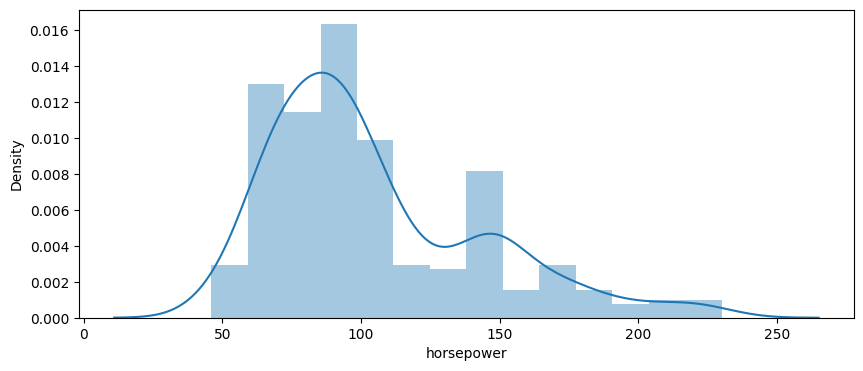

In [19]:
# Figure size
plt.figure(figsize=(10, 4))

# distplots for horsepower
sns.distplot(df["horsepower"])

plt.show()

**Key Observations**
- ***Bimodal Distribution:*** The distribution appears to be bimodal , with two distinct peaks:
    - A primary peak around 70–90 horsepower , indicating that many cars have moderate horsepower.
    - A secondary peak around 150–180 horsepower , suggesting a smaller group of cars with higher horsepower.
- ***Long Tail on the Right:*** There is a long tail extending toward higher horsepower values (up to 250), indicating some cars have significantly higher horsepower than the majority.
- ***Low Density at Very Low Horsepower:*** The density is very low for horsepower values below 50, suggesting few cars have extremely low horsepower.<br><br>

**Key Takeway**<br><br>
The `horsepower` variable has a bimodal distribution , with most cars falling into two groups: those with moderate horsepower (around 70–90) and those with higher horsepower (around 150–180). Additionally, there are a few cars with very high horsepower, creating a long tail.<br><br>***

**Decision**
- ***Explore Bimodality:*** Investigate why the data is bimodal.
- ***Correlation Analysis:*** Analyze how horsepower correlates with MPG to understand its impact on fuel efficiency.

### distplot for origin

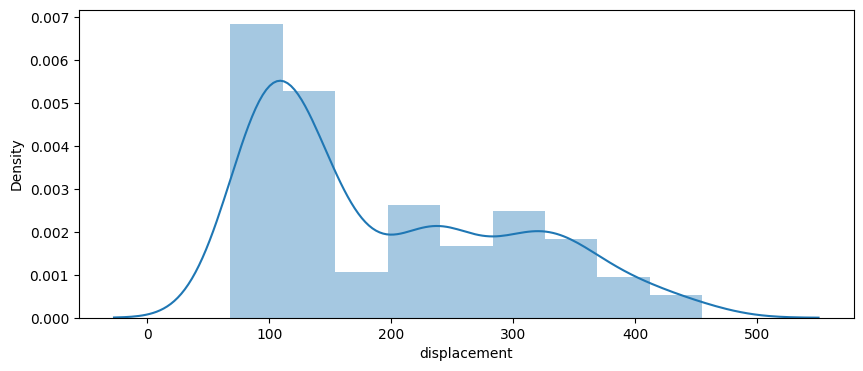

In [20]:
# figure size
plt.figure(figsize=(10, 4))

# distplots for displacement
sns.distplot(df["displacement"])

plt.show()

**Key Observations**
- ***Primary Peak:*** There is a prominent peak around 100–120 cubic inches , indicating that many cars have moderate engine displacements.
- ***Secondary Peaks:*** There are smaller peaks around 200–250 cubic inches and 300–350 cubic inches , suggesting additional groups of cars with larger engine displacements.
- ***Long Tail on the Right:*** The distribution has a long tail extending toward higher displacement values (up to 500 cubic inches), indicating some cars have significantly larger engines.
- ***Low Density at Very Low Displacement:*** The density is very low for displacement values below 50, suggesting few cars have extremely small engines.<br><br>

**Key Takeway**<br><br>
The `displacement` variable has a multimodal distribution with a primary peak around 100–120 cubic inches and secondary peaks around 200–250 cubic inches and 300–350 cubic inches . Additionally, there are a few cars with very high displacement values, creating a long tail.<br><br>

**Decision**
- ***Explore Multimodality:*** Investigate why the data is multimodal.
- ***Correlation Analysis:*** Analyze how engine displacement correlates with MPG to understand its impact on fuel efficiency.

## Bivariate Analysis
- Boxplot for examining relation between target and other variables

### Boxplot for examining relation between mpg and cylinders

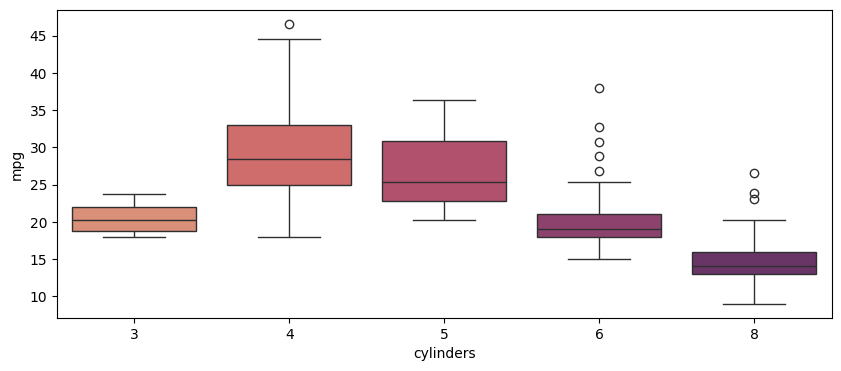

In [21]:
# figure size
plt.figure(figsize=(10, 4))

# boxplot for mpg vs cylinders
sns.boxplot(data=df, x = "cylinders", y = "mpg", palette="flare")

# show the plot
plt.show()


**Key Observations**
- MPG Decreases with More Cylinders:
    - Cars with 3 cylinders have the high median MPG (~20–25).
    - Cars with 4 cylinders have highest median MPG (~25–30), and also slightly higher than 3-cylinder cars.
    - Cars with 5 cylinders show a noticeable drop in MPG (~20–25).
    - Cars with 6 cylinders have even lower MPG (~15–20).
    - Cars with 8 cylinders have the lowest MPG (~10–15).
- Outliers:
    - There are no significant outliers in the MPG values for any category of cylinders.<br><br>

**Key Takeway**<br><br>
There is a negative correlation between the number of cylinders and MPG. As the number of cylinders increases, the MPG tends to decrease.<br><br>

**Decision**
- Include `cylinders` in the Model: Given its strong relationship with MPG, the `cylinders` variable should be included as a predictor in the model.
- Explore Interaction Effects: Investigate whether the effect of `cylinders` on MPG interacts with other variables.
- Handle Multicollinearity: If other features like `displacement` or `horsepower` are highly correlated with `cylinders`, consider dimensionality reduction techniques or feature selection to avoid multicollinearity.

### Boxplot for examining relation between mpg and model year

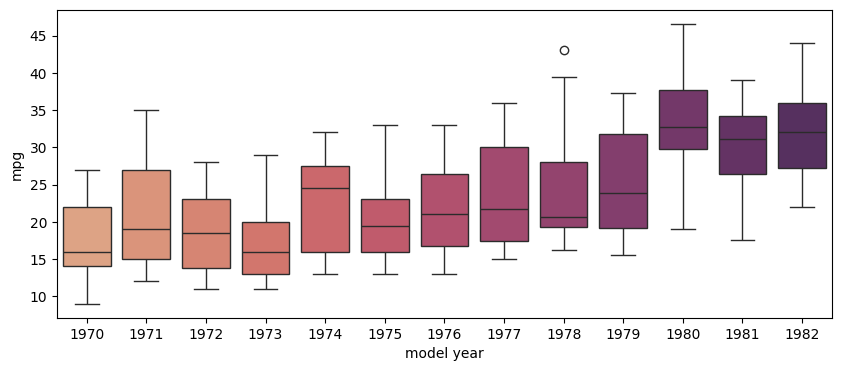

In [22]:
# figure size
plt.figure(figsize=(10, 4))

# boxplot for mpg vs model year
sns.boxplot(data=df, x= "model year", y = "mpg", palette="flare")

# show the plot
plt.show()

**Key Observations**
- MPG Improves Over Time:
    - Cars from earlier years (1970–1973) generally have lower median MPG (~15–20).
    - Cars from years (1974–1979) generally have median MPG (~20–25).
    - Cars from later years (1980–1982) show higher median MPG (~30–35), implying more consistent fuel efficiency.
    - There is a noticeable upward trend in MPG as the model year increases.
- Variability Remains Relatively Stable:
    - The interquartile range (IQR) of MPG is fairly consistent across most model years.
    - The IQR ranges from approximately 10 to 15 MPG, indicating a relatively stable spread
- Outliers:
    - There are a few outliers in certain years (e.g., 1978) which may represent high-efficiency vehicles ahead of their time.
- Plateau Around Mid-1970s:
    - From 1975 to 1978 , there is a slight plateau in MPG, with median values hovering around ~20–22.
    - This suggests that improvements in fuel efficiency might have slowed down during this period.
- Whisker Spread:
    - The maximum MPG also increases across years.
    - Minimum MPG remains relatively stable or slightly increases.<br><br>

**Key Takeway**<br><br>
There is a positive correlation between `model year` and `mpg`. As the model year increases, the median MPG tends to improve, indicating that newer cars are generally more fuel-efficient. However, the rate of improvement is not constant, with a plateau observed in the mid-1970s.<br><br>

**Decision**
- Include `model year` in the Model: Given the clear trend, `model year` should be included as a predictor in the model.

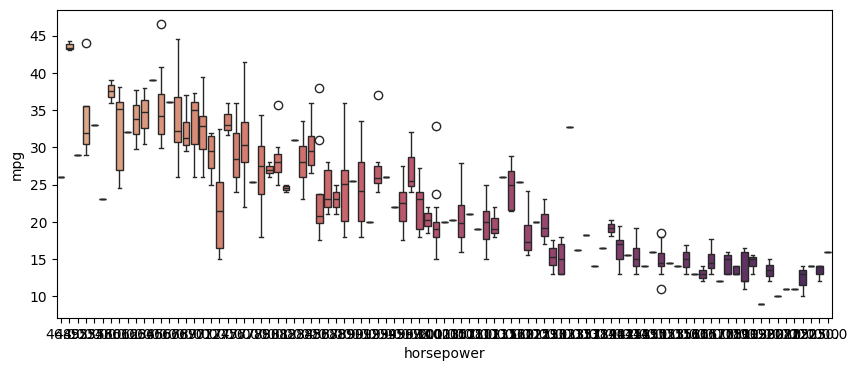

In [23]:
# figure size
plt.figure(figsize=(10, 4))

# boxplot for mpg vs horsepower
sns.boxplot(data=df, x= "horsepower", y = "mpg", palette="flare")

# show the plot
plt.show()

**Key Observations**
- High Variability at Lower Horsepower:
    - Lower horsepower bins (e.g., 48–80 HP) have wider IQRs and more outliers, suggesting greater diversity in fuel efficiency for smaller engines.
- Compression at High Horsepower:
    - As horsepower exceeds ~120 HP, both the MPG median and spread become lower and tighter, indicating consistently poor fuel efficiency among high-performance vehicles.
- Outliers are Predominantly on the Higher Side of MPG:
    - Several outliers at lower horsepower show MPG values above 40, indicating exceptionally fuel-efficient cars, possibly small or hybrid vehicles.
- Data Skewed Towards Lower Horsepower:
    - More data points appear in the low-to-mid horsepower range, possibly indicating production bias toward economy-class vehicles.<br><br>

**Key Takeway**<br><br>
There is a strong inverse correlation between horsepower and fuel efficiency. As horsepower increases, the median MPG decreases consistently. This implies that higher horsepower vehicles consume more fuel, leading to lower MPG. Lower horsepower vehicles are more fuel-efficient but also more varied in performance. High horsepower cars offer predictably low MPG, making them less suitable in fuel-conscious scenarios.<br><br>

**Decision**
- This pattern justifies deeper regression modeling to predict MPG from `horsepower` and other predictors like `weight`, `cylinders`, and `displacement`.

## Multivariate Analysis
- lmplot() for relationships between target and other variables for different origins

### lmplot for relationships between mpg and horsepower for different origins

<Figure size 1000x400 with 0 Axes>

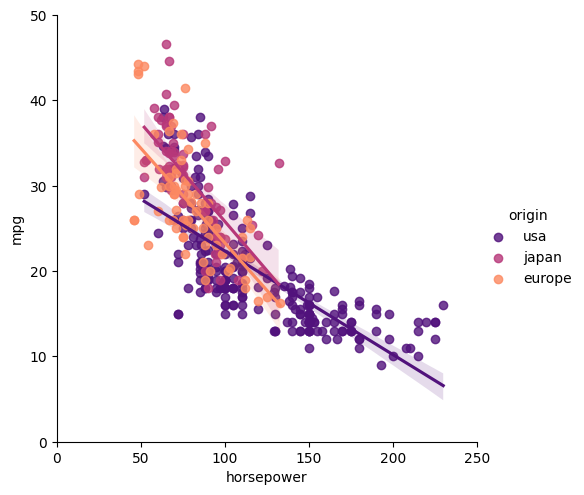

In [24]:
# figure size
plt. figure(figsize=(10, 4))

# implot for mpg vs horsepower
plot = sns.lmplot(data=df, x="horsepower", y = "mpg", hue="origin", palette="magma")

# set boundaries for x and y axes
plot.set(xlim=(0, 250), ylim=(0, 50))

# show the plot
plt.show()

**Key Observations**
- Negative Correlation Between Horsepower and MPG:
    - For all origins (USA, Japan, Europe), there is a clear negative correlation between horsepower and MPG. **As horsepower increases, MPG tends to decrease.**
- Different Trends for Different Origins:
    - **USA Cars:** Have the steepest downward slope, indicating that an increase in horsepower leads to a more significant decrease in MPG compared to other origins. USA cars generally have lower MPG across most horsepower ranges.
    - **Japan Cars:** Show a moderate negative trend. Japan cars tend to have higher MPG than USA cars at similar horsepower levels.
    - **Europe Cars:** Also show a negative trend but appear to have slightly better MPG than USA cars at higher horsepower levels, though not as efficient as Japan cars.
- Confidence Intervals:
    - The shaded regions around the regression lines indicate the range within which the true regression line likely falls. Wider intervals suggest more variability or less certainty in the trend.<br><br>

**Key Takeway**
- Horsepower strongly negatively correlates with MPG for all origins.
- Japan cars are generally more fuel-efficient than USA and European cars at similar horsepower levels.
- USA cars are the least fuel-efficient , showing the steepest decline in MPG with increasing horsepower.
- European cars fall somewhere in between USA and Japan cars in terms of fuel efficiency.<br><br>

**Decision**
- Include Both `horsepower` and `origin` in the Model: Given the strong negative correlation and the differences in trends across origins, both features should be included in the model.
- Explore Interaction Effects: Investigate whether the effect of `horsepower` on MPG interacts with `origin`.

### lmplot for relationships between mpg and acceleration for different origins

<Figure size 1000x400 with 0 Axes>

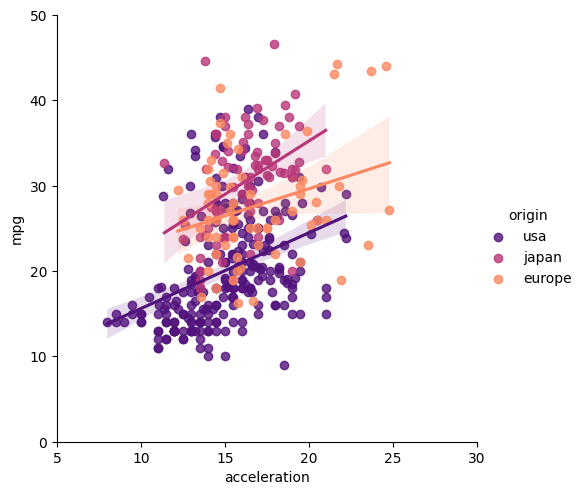

In [25]:
# figure size
plt.figure(figsize=(10, 4))

# implot for mpg vs acceleration
sns.lmplot(data=df, x="acceleration", y="mpg", hue="origin", palette="magma")

# set boundaries for x and y axes
plt.xlim(5, 30)
plt.ylim(0, 50)

plt.show()

**Key Observations**
- Negative Correlation Between Acceleration and MPG:
    - For all origins (USA, Japan, Europe), there is a clear negative correlation between acceleration and MPG. **As acceleration time increases (slower acceleration), MPG tends to increase**. So, this a correct ratio.
- Different Trends for Different Origins:
    - **USA Cars:** Show a moderate negative trend. USA cars tend to have lower MPG at faster acceleration times compared to other origins.
    - **Japan Cars:** Show a steeper negative trend. Japan cars appear to be more sensitive to changes in acceleration, with a more pronounced decrease in MPG as acceleration decreases.
    - **Europe Cars:** Also show a negative trend but appear to have slightly better MPG than USA cars at similar acceleration levels, though not as efficient as Japan cars.
- Confidence Intervals:
    - The shaded regions around the regression lines indicate the range within which the true regression line likely falls. Wider intervals suggest more variability or less certainty in the trend.<br><br>

**Key Takeway**
- Acceleration strongly negatively correlates with MPG for all origins.
- Japan cars are generally more sensitive to acceleration changes, showing the steepest decline in MPG with faster acceleration.
- USA cars are less sensitive to changes in acceleration compared to Japan cars but still show a noticeable trend.
- European cars fall somewhere in between USA and Japan cars in terms of sensitivity to acceleration.
- The USA cars seem a bit more advantageous when the MPG relationship is examined according to the acceleration of the cars.<br><br>

**Decision**
- Include Both `acceleration` and `origin` in the Model: Given the positive correlation and the differences in trends across origins, both features should be included in the model.
- Explore Interaction Effects: Investigate whether the effect of `acceleration` on MPG interacts with `origin`.

### lmplot for relationships between mpg and weight for different origins

<Figure size 1000x400 with 0 Axes>

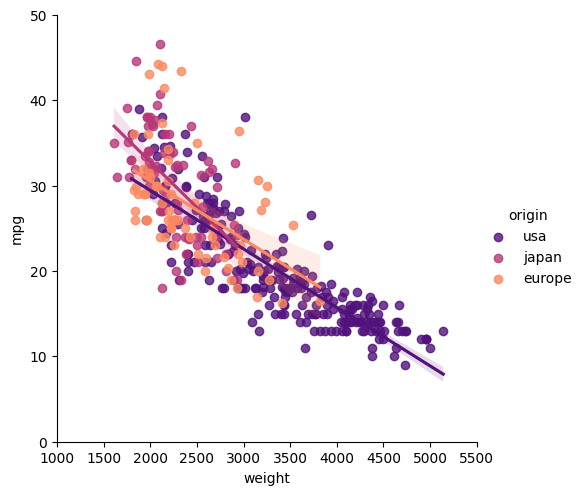

In [26]:
# figure size
plt.figure(figsize=(10, 4))

# lmplot for mpg vs weight
sns.lmplot(data=df, x = "weight", y="mpg", hue='origin', palette="magma")

# set boundaries for x and y axes
plt.xlim(1000, 5500)
plt.ylim(0, 50)

plt.show()

**Key Observations**
- Negative Correlation Between Weight and MPG:
    - For all origins (USA, Japan, Europe), there is a clear negative correlation between weight and MPG. **As weight increases, MPG tends to decrease.**
- Different Trends for Different Origins:
    - **USA Cars:** Show the steepest downward slope, indicating that an increase in weight leads to a more significant decrease in MPG compared to other origins. USA cars generally have lower MPG across most weight ranges.
    - **Japan Cars:** Show a moderate negative trend. Japan cars tend to have higher MPG than USA cars at similar weight levels.
    - **Europe Cars:** Also show a negative trend but appear to have slightly better MPG than USA cars at higher weight levels, though not as efficient as Japan cars.
- Confidence Intervals:
    - The shaded regions around the regression lines indicate the range within which the true regression line likely falls. Wider intervals suggest more variability or less certainty in the trend.<br><br>

**Key Takeway**
- After the values of 3500, there is no increase in the weight of cars of Japanese and European origin.
- The vehicle originiting in the USA increases after the value of 3500 upto 5200.
- Weight strongly negatively correlates with MPG for all origins.
- Japan cars are generally more fuel-efficient than USA and European cars at similar weight levels.
- USA cars are the least fuel-efficient , showing the steepest decline in MPG with increasing weight.
- European cars fall somewhere in between USA and Japan cars in terms of fuel efficiency.<br><br>

**Decision**
- Include Both `weight` and `origin` in the Model: Given the strong negative correlation and the differences in trends across origins, both features should be included in the model.
- Explore Interaction Effects: Investigate whether the effect of `weight` on MPG interacts with car origin.

### lmplot for relationships between mpg and weight for different origins

<Figure size 1000x400 with 0 Axes>

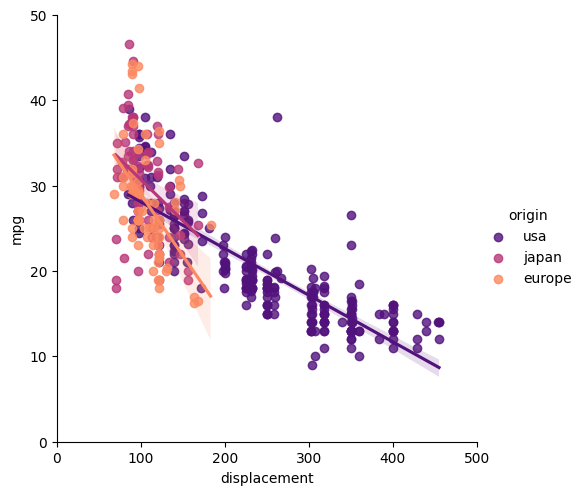

In [27]:
# figure size
plt.figure(figsize=(10, 4))

# lmplot for mpg vs displacement
sns.lmplot(data = df, x="displacement", y="mpg", hue = "origin", palette="magma")

# set boundaries for x and y axes
plt.ylim(0, 50)
plt.xlim(0, 500)

plt.show()

**Key Observations**
- Negative Correlation Between Displacement and MPG:
    - For all origins (USA, Japan, Europe), there is a clear negative correlation between displacement and MPG. **As displacement increases, MPG tends to decrease.**
- Different Trends for Different Origins:
    - **USA Cars:** Show the steepest downward slope, indicating that an increase in displacement leads to a more significant decrease in MPG compared to other origins.
USA cars generally have lower MPG across most displacement ranges.
    - **Japan Cars:** Show a moderate negative trend. Japan cars tend to have higher MPG than USA cars at similar displacement levels.
    - **Europe Cars:** Also show a negative trend but appear to have slightly better MPG than USA cars at higher displacement levels, though not as efficient as Japan cars.
- Confidence Intervals:
    - The shaded regions around the regression lines indicate the range within which the true regression line likely falls. Wider intervals suggest more variability or less certainty in the trend.<br><br>

**Key Takeway**
- After the value of 180, there is no more increase in European and Japanese cars.
- Displacement strongly negatively correlates with MPG for all origins.
- Japan cars are generally more fuel-efficient than USA and European cars at similar displacement levels.
- USA cars are the least fuel-efficient , showing the steepest decline in MPG with increasing displacement.
- European cars fall somewhere in between USA and Japan cars in terms of fuel efficiency.<br><br>

**Decision**
- Include Both `displacement` and `origin` in the Model: Given the strong negative correlation and the differences in trends across origins, both features should be included in the model.
- Explore Interaction Effects: Investigate whether the effect of `displacement` on MPG interacts with car origin.

## Heatmap of correlation Matrix

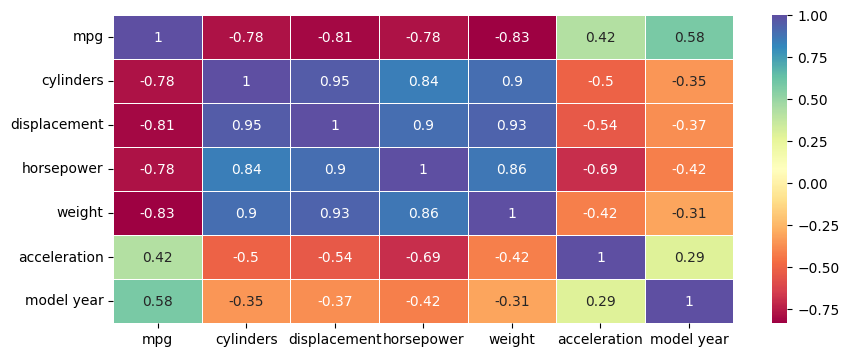

In [28]:
# figure size
plt.figure(figsize=(10, 4))

# correlation heatmap
sns.heatmap(df.select_dtypes(include="number").corr(), annot=True, cmap="Spectral", linewidths=0.5)

# show the plot
plt.show()

**Key Observation**
- Correlation Status of Variables with MPG: All other  variables  exxcept `acceleration` & `model year` are inversely proportional to the `mpg` variable
- Lowest Correlation with MPG with Value: The variable with the lowest correlation with `mpg` is the variable `acceleration` with a value of 0.42
- Strongest Correlation with MPG with Value: The variable with the strongest correlation with `mpg` is the `weight` variable with a value of -0.83
- Other variables that are highly correlated with each other: `displacement` is highly correlated with `cylinders`, `horsepower` and `weight`. It has  a correlation with them over 90%. <br><br>

**Key Takeway**
- Acceleration has the weakest correlation with MPG, it may contribute less to predicting fuel efficiency.
- Including all highly correlated variables (cylinders, displacement, horsepower, weight) together in a model could cause multicollinearity issues, which can distort predictions and reduce interpretability.

**Decision**
- Lowest Correlation with MPG: Consider removing `acceleration` (corr = 0.42) for simplifying the model.
- Strongest Correlation with MPG: Keep weight as the most influential variable due to its strongest correlation (-0.83).
- Multicollinearity Handling: Remove `displacement` for high correlation with others except the `mpg`.

In [29]:
# Dropping 'acceleration' and 'displacement' due to low correlation with MPG and multicollinearity with other features
df.drop(['acceleration', 'displacement'], axis=1, inplace=True)

# check data structures
df.head()

,mpg,cylinders,horsepower,weight,model year,origin
0,18.0,8,130.0,3504,1970,usa
1,15.0,8,165.0,3693,1970,usa
2,18.0,8,150.0,3436,1970,usa
3,16.0,8,150.0,3433,1970,usa
4,17.0,8,140.0,3449,1970,usa


# Feature Engineering

## Enhance Data Clarity with New Derived Column
- Since `model year` represents a specific year, we created a new feature `car_age` to capture the total duration until today, then dropped the original column.

In [30]:
# create new feature 'car_age' based on 'model year'
df['car_age'] = datetime.now().year - df['model year']

# drop 'model year' column as it's now redundant
df.drop('model year', axis=1, inplace=True)

In [31]:
# new dataset review with new changes
df.head()

,mpg,cylinders,horsepower,weight,origin,car_age
0,18.0,8,130.0,3504,usa,55
1,15.0,8,165.0,3693,usa,55
2,18.0,8,150.0,3436,usa,55
3,16.0,8,150.0,3433,usa,55
4,17.0,8,140.0,3449,usa,55


## Categorical Encoding
The `origin` variable, which includes the categories "USA", "Japan", and "Europe", is encoded using `pd.get_dummies()` to convert it into a set of binary columns suitable for model input, ensuring no ordinal relationship is assumed.

In [32]:
# new dummy dataframe structure
df = pd.get_dummies(df, columns=['origin'], drop_first=True)

# new dataset review with dummy variables
df.head()

,mpg,cylinders,horsepower,weight,car_age,origin_japan,origin_usa
0,18.0,8,130.0,3504,55,False,True
1,15.0,8,165.0,3693,55,False,True
2,18.0,8,150.0,3436,55,False,True
3,16.0,8,150.0,3433,55,False,True
4,17.0,8,140.0,3449,55,False,True


# Save Data Before Modelling

In [33]:
# save the output in csv format
df.to_csv("data/mpg_cleaned.csv", index=False)